In [1]:
import random
from miniml.ridge import *
import matplotlib.pyplot as plt

## Linear Case

In [2]:
N = 20
x = np.reshape(range(0, N), (-1, 1))
x = np.insert(x, 0, [1 for _ in range(N)], axis=1) # augmented notation
y = [random.uniform(per[1]+3, per[1]+5) for per in x]

**Algebraic Method**

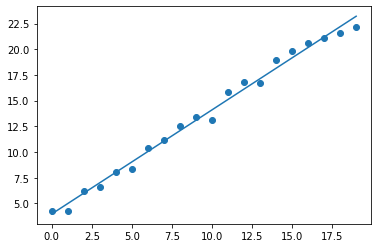

In [3]:
ridge = Ridge(x, y)
ridge.fit(sol='algebra', lambd=0.001) # in linear case, we don't need l2 norm to get optimal solution

pred = ridge.predict(x)
plt.scatter(x[:,1], y)
_ = plt.plot(x[:,1], pred)

**Sequential GD Method**

Last 900 Epochs
Last 800 Epochs
Last 700 Epochs
Last 600 Epochs
Last 500 Epochs
Last 400 Epochs
Last 300 Epochs
Last 200 Epochs
Last 100 Epochs


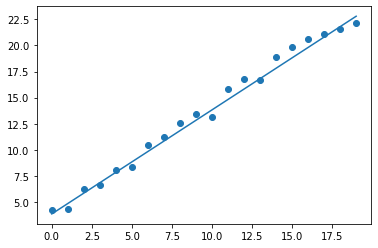

In [4]:
ridge = Ridge(x, y)
ridge.fit(max_epoch=1000, sol='GD', lambd=0.001, lr=0.01)

pred = ridge.predict(x)
plt.scatter(x[:,1], y)
_ = plt.plot(x[:,1], pred)

## Nonlinear Case

### Data 1

In [5]:
N = 20
x = np.reshape(np.arange(0, N, 0.2), (-1, 1))
x = np.insert(x, 0, [1 for _ in range(len(x))], axis=1) # augmented notation
y = [np.sin(per[1]) for per in x]

**Algebraic Method**

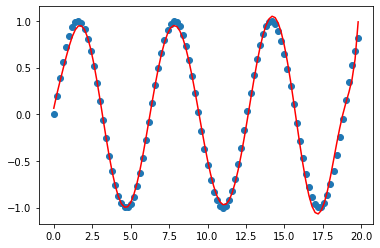

In [6]:
ridge = Ridge(x, y)
ridge.fit(sol='algebra', kernel='polynomial', lambd=0.01, d=11)

pred = ridge.predict(x)
plt.scatter(x[:,1], y)
_ = plt.plot(x[:,1], pred, color='r')

**Sequential GD Method**

In this case (SGD & Polynomial), the weights increase too fast to have a reasonable prediction; standardization can only make performance a little bit better

Last 900 Epochs
Last 800 Epochs
Last 700 Epochs
Last 600 Epochs
Last 500 Epochs
Last 400 Epochs
Last 300 Epochs
Last 200 Epochs
Last 100 Epochs


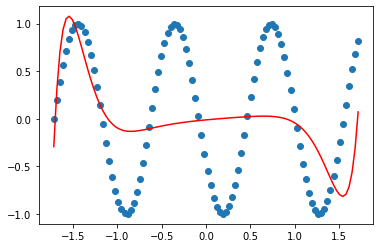

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_x = np.copy(x)
std_x[:,1:] = scaler.fit_transform(std_x[:,1:])

ridge = Ridge(std_x, y)
ridge.fit(max_epoch=1000, sol='GD', kernel='polynomial', lambd=0.001, lr=0.001, d=11)

pred = ridge.predict(std_x)
plt.scatter(std_x[:,1], y)
_ = plt.plot(std_x[:,1], pred, color='r')

**SGD with Sin function**

Last 900 Epochs
Last 800 Epochs
Last 700 Epochs
Last 600 Epochs
Last 500 Epochs
Last 400 Epochs
Last 300 Epochs
Last 200 Epochs
Last 100 Epochs


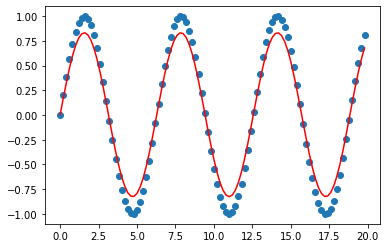

In [8]:
ridge = Ridge(x, y)
ridge.fit(max_epoch=1000, sol='GD', kernel='sin', lambd=0.001, lr=0.01)

pred = ridge.predict(x)
plt.scatter(x[:,1], y)
_ = plt.plot(x[:,1], pred, color='r')